<a href="https://colab.research.google.com/github/phongpirik/CS2225.CH1501/blob/master/LAB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import package

In [ ]:
# import the necessary packages
import numpy as np
import argparse
import cv2
import os
from skimage import io
from google.colab.patches import cv2_imshow

Load image from data google colab



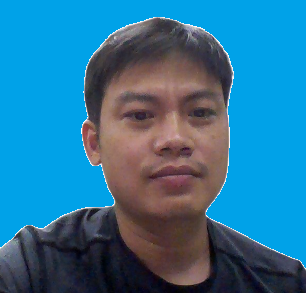

In [ ]:
image = cv2.imread("/content/sample_data/out.png")
cv2_imshow(image)

Lấy ảnh từ url


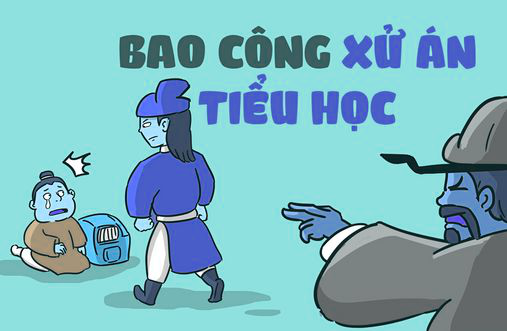

In [ ]:
url = "https://cuoifly.tuoitre.vn/507/380/ttc/r/2020/10/05/truyen-trnah-vui-bao-cong-xu-an-tieu-hoc-1601872760-26x17.jpg"
image = io.imread(url)
cv2_imshow(image)

Lấy ảnh từ camera


In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


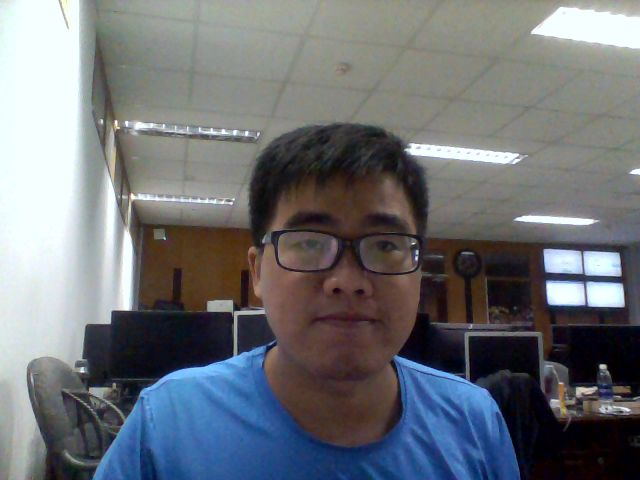

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

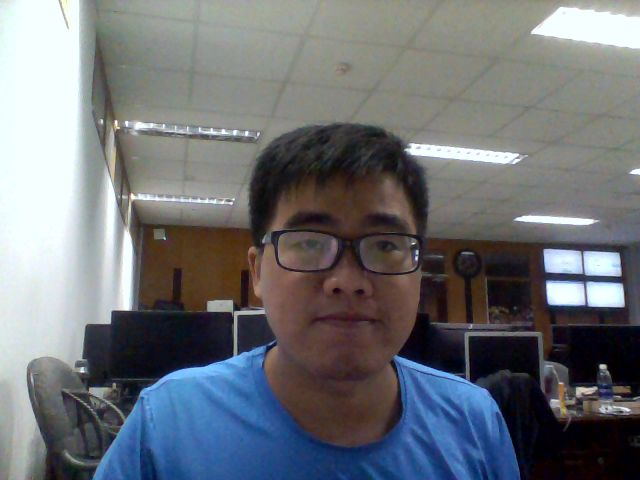

In [ ]:
image = cv2.imread(filename)
cv2_imshow(image)

In [ ]:
!pip install gdown

!pwd
!mkdir opencv-age-detection
!mkdir opencv-age-detection/face_detector
!mkdir opencv-age-detection/age_detector

import gdown 
# deploy.prototxt
url = "https://drive.google.com/uc?id=1LzKm15hg_7tJwKhfG9-xC7w2-1PQqR0-" 
dest = "opencv-age-detection/face_detector/deploy.prototxt"
gdown.download(url, dest, quiet=False) 

url = "https://drive.google.com/uc?id=1BQERdF1VT3K_SodTNtmqXpNEm9sybXx6"
dest = "opencv-age-detection/face_detector/res10_300x300_ssd_iter_140000.caffemodel"
gdown.download(url, dest, quiet=False) 

#age_deploy.prototxt

url = "https://drive.google.com/uc?id=1PNKZTOWG8qMoeYjUL6uATxwZjoqmbz4s" 
dest = "opencv-age-detection/age_detector/age_deploy.prototxt"
gdown.download(url, dest, quiet=False) 

url = "https://drive.google.com/uc?id=1M4_8h3m7NaLIOn9qhMnXQCSOJtBhBpkP" 
dest = "opencv-age-detection/age_detector/age_net.caffemodel"
gdown.download(url, dest, quiet=False)


/content


Downloading...
From: https://drive.google.com/uc?id=1LzKm15hg_7tJwKhfG9-xC7w2-1PQqR0-
To: /content/opencv-age-detection/face_detector/deploy.prototxt
100%|██████████| 28.1k/28.1k [00:00<00:00, 5.37MB/s]
Downloading...
From: https://drive.google.com/uc?id=1BQERdF1VT3K_SodTNtmqXpNEm9sybXx6
To: /content/opencv-age-detection/face_detector/res10_300x300_ssd_iter_140000.caffemodel
10.7MB [00:00, 19.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1PNKZTOWG8qMoeYjUL6uATxwZjoqmbz4s
To: /content/opencv-age-detection/age_detector/age_deploy.prototxt
100%|██████████| 2.31k/2.31k [00:00<00:00, 2.00MB/s]
Downloading...
From: https://drive.google.com/uc?id=1M4_8h3m7NaLIOn9qhMnXQCSOJtBhBpkP
To: /content/opencv-age-detection/age_detector/age_net.caffemodel
45.7MB [00:01, 38.6MB/s]


'opencv-age-detection/age_detector/age_net.caffemodel'

In [ ]:
# load our serialized face detector model from disk
face_det_dir = "/content/opencv-age-detection/face_detector"
age_det_dir = "/content/opencv-age-detection/age_detector"



print("[INFO] loading face detector model...")
prototxtPath = os.path.sep.join([face_det_dir, "deploy.prototxt"])
weightsPath = os.path.sep.join([face_det_dir,
	"res10_300x300_ssd_iter_140000.caffemodel"])
faceNet = cv2.dnn.readNet(prototxtPath, weightsPath)
# load our serialized age detector model from disk
print("[INFO] loading age detector model...")
prototxtPath = os.path.sep.join([age_det_dir, "age_deploy.prototxt"])
weightsPath = os.path.sep.join([age_det_dir, "age_net.caffemodel"])
ageNet = cv2.dnn.readNet(prototxtPath, weightsPath)

[INFO] loading face detector model...
[INFO] loading age detector model...


In [ ]:
# load the input image and construct an input blob for the image
(h, w) = image.shape[:2]
blob = cv2.dnn.blobFromImage(image, 1.0, (300, 300),
	(104.0, 177.0, 123.0))
# pass the blob through the network and obtain the face detections
print("[INFO] computing face detections...")
faceNet.setInput(blob)
detections = faceNet.forward()

[INFO] computing face detections...


In [ ]:
# define the list of age buckets our age detector will predict
AGE_BUCKETS = ["(0-2)", "(4-6)", "(8-12)", "(15-20)", "(25-32)",
	"(38-43)", "(48-53)", "(60-100)"]

# loop over the detections
arg_conf= 0.5
for i in range(0, detections.shape[2]):
	# extract the confidence (i.e., probability) associated with the
	# prediction
	confidence = detections[0, 0, i, 2]
	# filter out weak detections by ensuring the confidence is
	# greater than the minimum confidence
	if confidence > arg_conf:
		# compute the (x, y)-coordinates of the bounding box for the
		# object
		box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
		(startX, startY, endX, endY) = box.astype("int")
		# extract the ROI of the face and then construct a blob from
		# *only* the face ROI
		face = image[startY:endY, startX:endX]
		faceBlob = cv2.dnn.blobFromImage(face, 1.0, (227, 227),
			(78.4263377603, 87.7689143744, 114.895847746),
			swapRB=False)
  		# make predictions on the age and find the age bucket with
		# the largest corresponding probability
		ageNet.setInput(faceBlob)
		preds = ageNet.forward()
		i = preds[0].argmax()
		age = AGE_BUCKETS[i]
		ageConfidence = preds[0][i]
		# display the predicted age to our terminal
		text = "{}: {:.2f}%".format(age, ageConfidence * 100)
		print("[INFO] {}".format(text))
		# draw the bounding box of the face along with the associated
		# predicted age
		y = startY - 10 if startY - 10 > 10 else startY + 10
		cv2.rectangle(image, (startX, startY), (endX, endY),
			(0, 0, 255), 2)
		cv2.putText(image, text, (startX, y),
			cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0, 0, 255), 2)


[INFO] (15-20): 66.15%


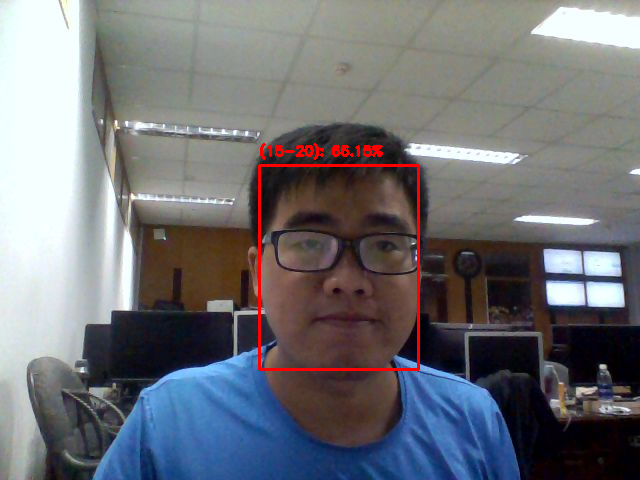

-1

In [ ]:
# display the output image
cv2_imshow(image)
cv2.waitKey(0)